<h1 style="display:none">Machine Learning Template Project - Step by step</h1>
<h1 style="background-color:#1e1e1e; color:white; padding:10px; margin:0;">
	<strong>
		Machine Learning Template Project
	</strong>
	- Step by step
</h1>

<h3 style="display:none">I. Prerequisites</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		I. Prerequisites
	</strong>
</h3>

##### Imports

In [318]:
import pandas as pd
from pathlib import Path

pd.set_option("display.max_columns", None)
import sys
import os

sys.path.insert(0, str(Path("..").resolve()))

from src import config_loading, logging_setup, mlflow_setup, data_loading, eda, preprocessing, feature_engineering, training

In [319]:
# ***DEFINE DATASET NAME BELOW***
dataset_name = "diabete"
# *******************************

In [320]:
logging_setup.setup_logging(dataset_name)

2025-08-12 13:45:17,536 - INFO - ℹ️ [logging_setup.setup_logging()] Logging initialisé; dossier: ../data/diabete/logs


In [321]:
CFG = config_loading.Config(dataset_name)

mlflow_setup.setup_mlflow(CFG, dataset_name)

2025-08-12 13:45:17,552 - INFO - ℹ️ [Config.config_loading.__init__()] Config loaded from ../data/diabete/config.yaml
2025-08-12 13:45:17,556 - INFO - ℹ️ [mlflow_setup.setup_mlflow()] MLflow experiment 'diabete' set up at ../data/diabete/mlruns
2025-08-12 13:45:17,557 - INFO - ℹ️ [mlflow_setup.delete_default_mlflow_experiment()] Default MLflow experiment folder not found.


In [322]:
CFG.print_all()

{'CLASSIFICATION_TYPE': 'multiclass',
 'CONFIG_FILE_PATH': PosixPath('../data/diabete/config.yaml'),
 'DATASET_NAME': 'diabete',
 'DATA_FOLDER_PATH': PosixPath('../data/diabete'),
 'DATA_TYPE_CONVERSION': {},
 'DEAL_OUTLIERS_STRATEGY': {},
 'DIMENSIONALITY_REDUCTION_STRATEGY': 'select_k_best',
 'ELEMENTS_TO_REPLACE_BY_NAN': ['?'],
 'K_BEST_FEATURES': 50,
 'LOG_IN_MLFLOW': True,
 'MISSING_VALUES_IMPUTATION_STRATEGY': {'diag_1': 'drop',
                                        'diag_2': 'drop',
                                        'diag_3': 'drop',
                                        'race': 'drop'},
 'ORDINALENCODER_COLUMNS': {'age': ['[0-10)',
                                    '[10-20)',
                                    '[20-30)',
                                    '[30-40)',
                                    '[40-50)',
                                    '[50-60)',
                                    '[60-70)',
                                    '[70-80)',
             

___

<h3 style="display:none">II. Import data</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		II. Import data
	</strong>
</h3>

In [323]:
df = data_loading.import_data(CFG)
df.head()

2025-08-12 13:45:17,947 - INFO - ℹ️ [data_loading.import_data()] CSV dataset imported from 'diabete/data.csv'


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


___

<h3 style="display:none">III. Exploratory Data Analysis</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		III. Exploratory Data Analysis
	</strong>
</h3>

#### Dataset dimensions

In [324]:
eda.get_dimensions(df)

2025-08-12 13:45:17,961 - INFO - ℹ️ [eda.get_dimensions()] Number of rows: 101766
2025-08-12 13:45:17,962 - INFO - ℹ️ [eda.get_dimensions()] Number of columns: 50


#### Reformat column names

In [325]:
df = eda.reformat_column_names(df)
df.head()

2025-08-12 13:45:17,970 - INFO - ℹ️ [eda.reformat_column_names()] Column names reformated: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesmed', 'readmitted']


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Rename certains columns

In [326]:
df = eda.rename_columns(CFG, df)
df.head()

2025-08-12 13:45:17,988 - INFO - ℹ️ [eda.rename_columns()] Step 'rename_columns' skipped because `COLUMNS.RENAME: {}`


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [327]:
if CFG.PROBLEM_TYPE == "classification":
    print(df[CFG.TARGET_VARIABLE].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


#### Replace in whole dataset

In [328]:
df = eda.replace_elements_by_nan(CFG, df)
df.head()

2025-08-12 13:45:18,442 - INFO - ℹ️ [eda.replace_elements_by_nan()] Replaced '?' by NaN (192849 occurrences)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Replace in specific columns

In [329]:
eda.unique_object_values(df.select_dtypes(include=["object", "category"]))

2025-08-12 13:45:18,688 - INFO - ℹ️ [eda.unique_object_values()]
race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psy

<aside style="border-left: 10px solid #ffef11; padding: 1em; background-color: #2c2c2c; color: white;">
	<p> ☝ Ajouter les colonnes qui présentent un ⚠️ dans le paramètre <code>COLUMNS.DROP</code> du fichier de config car cette colonne n'est composée que d'une seule valeur et n'apporte donc rien.</p>
</aside>

<aside style="border-left: 10px solid #ffef11; padding: 1em; background-color: #2c2c2c; color: white;">
	<p> ☝ Vérifier que l'on ne peut pas remplacer certains strings par des valeurs numériques (ex : one = 1, two = 2...). Si oui, utiliser le paramètre <code>REPLACE_ELEMENTS_BY_SOMETHING</code> du fichier de config.</p>
</aside>

In [330]:
df = eda.replace_elements_by_something(CFG, df)
df.head()

2025-08-12 13:45:18,703 - INFO - ℹ️ [eda.replace_elements_by_something()] Step 'replace_elements_by_something' skipped because `CLEANING.REPLACE_MAP: {}`


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [331]:
df = eda.replace_in_specific_columns(CFG, df)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


##### Number of unique values in each `object` column

In [332]:
eda.nb_unique_values(CFG, df)

2025-08-12 13:45:18,824 - INFO - ℹ️ [eda.nb_unique_values()] Categorical features:
2025-08-12 13:45:18,830 - INFO - ℹ️ [eda.nb_unique_values()] - race: 5
2025-08-12 13:45:18,842 - INFO - ℹ️ [eda.nb_unique_values()] - gender: 3
2025-08-12 13:45:18,848 - INFO - ℹ️ [eda.nb_unique_values()] - age: 10
2025-08-12 13:45:18,851 - INFO - ℹ️ [eda.nb_unique_values()] - weight: 9
2025-08-12 13:45:18,855 - INFO - ℹ️ [eda.nb_unique_values()] - payer_code: 17
2025-08-12 13:45:18,860 - INFO - ℹ️ [eda.nb_unique_values()] - medical_specialty: 72
2025-08-12 13:45:18,865 - INFO - ℹ️ [eda.nb_unique_values()] - diag_1: 716
2025-08-12 13:45:18,870 - INFO - ℹ️ [eda.nb_unique_values()] - diag_2: 748
2025-08-12 13:45:18,875 - INFO - ℹ️ [eda.nb_unique_values()] - diag_3: 789
2025-08-12 13:45:18,878 - INFO - ℹ️ [eda.nb_unique_values()] - max_glu_serum: 3
2025-08-12 13:45:18,881 - INFO - ℹ️ [eda.nb_unique_values()] - a1cresult: 3
2025-08-12 13:45:18,886 - INFO - ℹ️ [eda.nb_unique_values()] - metformin: 4
2025-08-1

##### Unique values

In [333]:
result = eda.unique_object_values(df)

2025-08-12 13:45:19,234 - INFO - ℹ️ [eda.unique_object_values()]
race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psy

<aside style="border-left: 10px solid #ffef11; padding: 1em; background-color: #2c2c2c; color: white;">
	<p> ☝ Si certaines colonnes contiennent des valeurs numériques entre <code>'...'</code>, il va falloir utiliser le paramètre <code>DATA_TYPE_CONVERSION</code> du fichier de config pour forcer le casting vers <code>int</code> ou <code>float</code></p>
</aside>

#### Delete unnecessary columns

In [334]:
df = eda.drop_unnecessary_columns(CFG, df)
df.head()

2025-08-12 13:45:19,274 - INFO - ℹ️ Unnecessary column 'payer_code' dropped (39.56% missing, 17 unique values)
2025-08-12 13:45:19,316 - INFO - ℹ️ Unnecessary column 'weight' dropped (96.86% missing, 9 unique values)
2025-08-12 13:45:19,359 - INFO - ℹ️ Unnecessary column 'max_glu_serum' dropped (94.75% missing, 3 unique values)
2025-08-12 13:45:19,400 - INFO - ℹ️ Unnecessary column 'a1cresult' dropped (83.28% missing, 3 unique values)
2025-08-12 13:45:19,441 - INFO - ℹ️ Unnecessary column 'examide' dropped (0.00% missing, 1 unique values)
2025-08-12 13:45:19,481 - INFO - ℹ️ Unnecessary column 'citoglipton' dropped (0.00% missing, 1 unique values)
2025-08-12 13:45:19,522 - INFO - ℹ️ Unnecessary column 'medical_specialty' dropped (49.08% missing, 72 unique values)
2025-08-12 13:45:19,560 - INFO - ℹ️ Unnecessary column 'metformin-rosiglitazone' dropped (0.00% missing, 2 unique values)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes,NO


#### Reorder columns

In [335]:
df = eda.reorder_columns(CFG, df)
df.head()

2025-08-12 13:45:19,661 - INFO - ℹ️ [eda.reorder_columns()] Columns reordered: ['admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'encounter_id', 'num_lab_procedures', 'num_medications', 'num_procedures', 'number_diagnoses', 'number_emergency', 'number_inpatient', 'number_outpatient', 'patient_nbr', 'time_in_hospital', 'acarbose', 'acetohexamide', 'age', 'change', 'chlorpropamide', 'diabetesmed', 'diag_1', 'diag_2', 'diag_3', 'gender', 'glimepiride', 'glimepiride-pioglitazone', 'glipizide', 'glipizide-metformin', 'glyburide', 'glyburide-metformin', 'insulin', 'metformin', 'metformin-pioglitazone', 'miglitol', 'nateglinide', 'pioglitazone', 'race', 'repaglinide', 'rosiglitazone', 'tolazamide', 'tolbutamide', 'troglitazone', 'readmitted']


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,diag_1,diag_2,diag_3,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted
0,1,6,25,2278392,41,1,0,1,0,0,0,8222157,1,No,No,[0-10),No,No,No,250.83,NaN,NaN,Female,No,No,No,No,No,No,No,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
1,7,1,1,149190,59,18,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,276,250.01,255,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30
2,7,1,1,64410,11,13,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,648,250,V27,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO
3,7,1,1,500364,44,16,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,8,250.43,403,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
4,7,1,1,16680,51,8,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,197,157,250,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO


<aside style="border-left: 10px solid #ffef11; padding: 1em; background-color: #2c2c2c; color: white;">
	<p> ☝ C'est OK si certaines colonnes ne sont pas bien catégorisées (car on attend d'avoir retirer les valeurs NaN avant de les caster dans le bon type)</p>
</aside>

#### Data types

In [336]:
eda.show_data_types(df)

2025-08-12 13:45:19,674 - INFO - ℹ️ [eda.show_data_types()]
admission_source_id          int64
admission_type_id            int64
discharge_disposition_id     int64
encounter_id                 int64
num_lab_procedures           int64
num_medications              int64
num_procedures               int64
number_diagnoses             int64
number_emergency             int64
number_inpatient             int64
number_outpatient            int64
patient_nbr                  int64
time_in_hospital             int64
acarbose                    object
acetohexamide               object
age                         object
change                      object
chlorpropamide              object
diabetesmed                 object
diag_1                      object
diag_2                      object
diag_3                      object
gender                      object
glimepiride                 object
glimepiride-pioglitazone    object
glipizide                   object
glipizide-metformin         ob

#### Missing values

In [337]:
missing_df = eda.show_missing_values(df)
missing_df

2025-08-12 13:45:19,875 - INFO - ℹ️ [eda.show_missing_values()] Missing values found:


,NULL,NaN,% Missing
Column,,,
race,2273,2273,2.23
diag_3,1423,1423,1.40
diag_2,358,358,0.35
diag_1,21,21,0.02


<aside style="border-left: 10px solid #ffef11; padding: 1em; background-color: #2c2c2c; color: white;">
	<p> ☝ Pour chacune des colonnes ci-dessus, choisir le type de conversion avec le paramètre <code>DATA_TYPE_CONVERSION</code> du fichier de config.</p>
</aside>

##### Deal with missing values

In [338]:
df = eda.deal_missing_values(CFG, df)
df.head()

2025-08-12 13:45:19,883 - INFO - ℹ️ Imputing 'diag_1' with 'drop'
2025-08-12 13:45:19,913 - INFO - ℹ️ Dropped 21 rows due to NaN in 'diag_1'
2025-08-12 13:45:19,913 - INFO - ℹ️ Imputing 'diag_2' with 'drop'
2025-08-12 13:45:19,950 - INFO - ℹ️ Dropped 357 rows due to NaN in 'diag_2'
2025-08-12 13:45:19,951 - INFO - ℹ️ Imputing 'diag_3' with 'drop'
2025-08-12 13:45:19,987 - INFO - ℹ️ Dropped 1144 rows due to NaN in 'diag_3'
2025-08-12 13:45:19,987 - INFO - ℹ️ Imputing 'race' with 'drop'
2025-08-12 13:45:20,024 - INFO - ℹ️ Dropped 2191 rows due to NaN in 'race'


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,diag_1,diag_2,diag_3,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted
1,7,1,1,149190,59,18,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,276,250.01,255,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30
2,7,1,1,64410,11,13,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,648,250,V27,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO
3,7,1,1,500364,44,16,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,8,250.43,403,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
4,7,1,1,16680,51,8,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,197,157,250,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
5,2,2,1,35754,31,16,6,9,0,0,0,82637451,3,No,No,[50-60),No,No,Yes,414,411,250,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30


##### Drop rows with missing target variable

In [339]:
df = eda.drop_na_target_variable(CFG, df)
df.head()

2025-08-12 13:45:20,058 - INFO - ℹ️ [eda.drop_na_target_variable()] 0 rows dropped because of missing values in target column 'readmitted'


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,diag_1,diag_2,diag_3,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted
1,7,1,1,149190,59,18,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,276,250.01,255,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30
2,7,1,1,64410,11,13,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,648,250,V27,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO
3,7,1,1,500364,44,16,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,8,250.43,403,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
4,7,1,1,16680,51,8,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,197,157,250,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
5,2,2,1,35754,31,16,6,9,0,0,0,82637451,3,No,No,[50-60),No,No,Yes,414,411,250,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30


##### Check missing values

In [340]:
result = eda.check_missing_values(df)
assert result == "No missing values found", f"❌ CANNOT CONTINUE: Missing values detected:\n{result}.\n👉 Check the 'CLEANING.IMPUTATION' parameter in the config file."

2025-08-12 13:45:20,140 - INFO - ℹ️ No missing values found


<aside style="border-left: 6px solid #007acc; padding: 1em; background-color: #2c2c2c; color: white;">
	<p>☝ S'assurer que le bloc précédent renvoie <code>No missing values found</code></p>
</aside>

#### Convert data type

In [341]:
eda.check_data_types(df)

2025-08-12 13:45:20,146 - INFO - ℹ️ [eda.check_data_types()]
admission_source_id          int64
admission_type_id            int64
discharge_disposition_id     int64
encounter_id                 int64
num_lab_procedures           int64
num_medications              int64
num_procedures               int64
number_diagnoses             int64
number_emergency             int64
number_inpatient             int64
number_outpatient            int64
patient_nbr                  int64
time_in_hospital             int64
acarbose                    object
acetohexamide               object
age                         object
change                      object
chlorpropamide              object
diabetesmed                 object
diag_1                      object
diag_2                      object
diag_3                      object
gender                      object
glimepiride                 object
glimepiride-pioglitazone    object
glipizide                   object
glipizide-metformin         o

<aside style="border-left: 6px solid #007acc; padding: 1em; background-color: #2c2c2c; color: white;">
	<p>☝ S'assurer que tous les types renvoyés par le bloc précédent sont les bons types.</p>
</aside>

In [342]:
df = eda.convert_data_type(CFG, df)
df = eda.reorder_columns(CFG, df)
df.head()

2025-08-12 13:45:20,153 - INFO - ℹ️ [eda.convert_data_type()] Step 'convert_data_type' skipped because `CLEANING.TYPE_CONVERSION: {}`
2025-08-12 13:45:20,202 - INFO - ℹ️ [eda.reorder_columns()] Columns reordered: ['admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'encounter_id', 'num_lab_procedures', 'num_medications', 'num_procedures', 'number_diagnoses', 'number_emergency', 'number_inpatient', 'number_outpatient', 'patient_nbr', 'time_in_hospital', 'acarbose', 'acetohexamide', 'age', 'change', 'chlorpropamide', 'diabetesmed', 'diag_1', 'diag_2', 'diag_3', 'gender', 'glimepiride', 'glimepiride-pioglitazone', 'glipizide', 'glipizide-metformin', 'glyburide', 'glyburide-metformin', 'insulin', 'metformin', 'metformin-pioglitazone', 'miglitol', 'nateglinide', 'pioglitazone', 'race', 'repaglinide', 'rosiglitazone', 'tolazamide', 'tolbutamide', 'troglitazone', 'readmitted']


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,diag_1,diag_2,diag_3,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted
1,7,1,1,149190,59,18,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,276,250.01,255,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30
2,7,1,1,64410,11,13,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,648,250,V27,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO
3,7,1,1,500364,44,16,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,8,250.43,403,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
4,7,1,1,16680,51,8,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,197,157,250,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
5,2,2,1,35754,31,16,6,9,0,0,0,82637451,3,No,No,[50-60),No,No,Yes,414,411,250,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30


#### Check uniques values

In [343]:
eda.unique_object_values(df)

2025-08-12 13:45:20,434 - INFO - ℹ️ [eda.unique_object_values()]
acarbose: ['No' 'Steady' 'Up' 'Down']
acetohexamide: ['No' 'Steady']
age: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
change: ['Ch' 'No']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
diabetesmed: ['Yes' 'No']
diag_1: ['276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157' '518' '999'
 '410' '682' '402' 'V57' '189' '786' '427' '996' '277' '584' '462' '473'
 '411' '174' '486' '998' '511' '432' '626' '295' '196' '250.6' '182' '845'
 '423' '808' '250.4' '722' '403' '784' '707' '440' '151' '715' '997' '198'
 '564' '38' '590' '578' '250.32' '433' '569' '185' '536' '255' '250.13'
 '599' '558' '574' '491' '560' '244' '250.03' '577' '730' '188' '824'
 '250.8' '332' '562' '291' '296' '510' '401' '263' '438' '70' '642' '571'
 '738' '593' '618' '250.42' '807' '456' '446' '572' '575' '250.41'
 '250.02' '820' '515' '780' '250.22' '995' '235' '250.82' '721' '787'
 '556' '162

<aside style="border-left: 6px solid #007acc; padding: 1em; background-color: #2c2c2c; color: white;">
	<p>☝ S'assurer que le bloc précédent renvoie uniquement des valeurs de type <code>object</code>, ou <code>✅ No object columns found</code></p>
</aside>

#### Outliers detection

In [344]:
df.describe().round(1)

,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital
count,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0,98053.0
mean,5.8,2.0,3.8,165829423.0,43.1,16.1,1.4,7.5,0.2,0.6,0.4,54847920.7,4.4
std,4.1,1.5,5.3,102432173.8,19.7,8.1,1.7,1.8,0.9,1.3,1.3,38661747.8,3.0
min,1.0,1.0,1.0,12522.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,135.0,1.0
25%,1.0,1.0,1.0,85285656.0,31.0,11.0,0.0,6.0,0.0,0.0,0.0,23502339.0,2.0
50%,7.0,1.0,1.0,153301920.0,44.0,15.0,1.0,8.0,0.0,0.0,0.0,46877904.0,4.0
75%,7.0,3.0,4.0,230500710.0,57.0,20.0,2.0,9.0,0.0,1.0,0.0,88003062.0,6.0
max,25.0,8.0,28.0,443867222.0,132.0,81.0,6.0,16.0,76.0,21.0,42.0,189502619.0,14.0


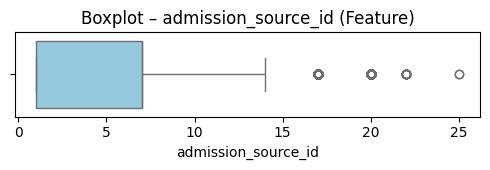

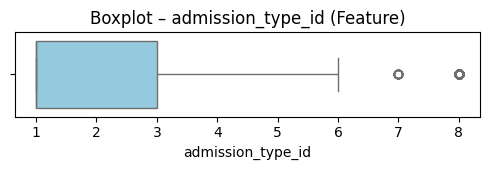

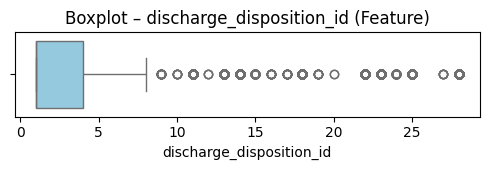

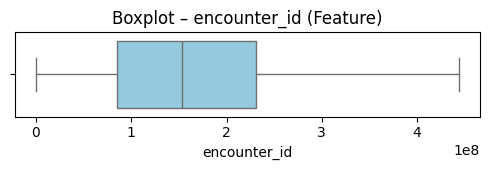

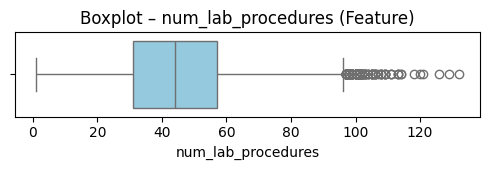

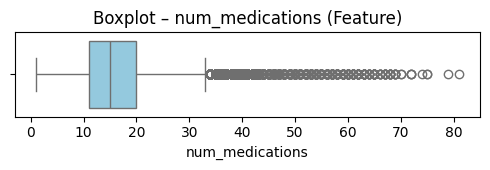

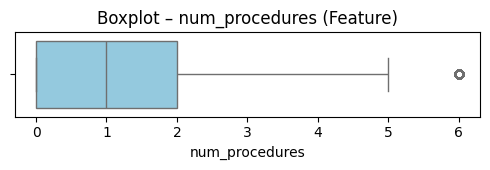

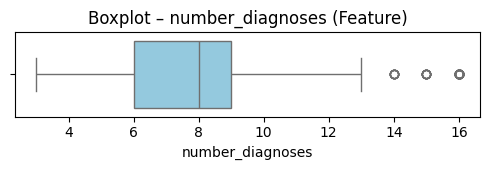

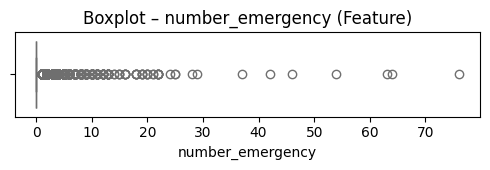

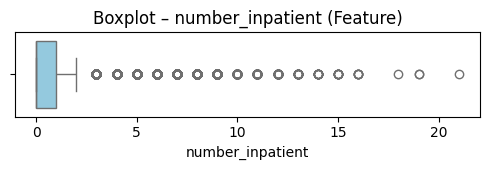

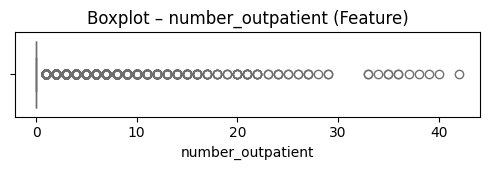

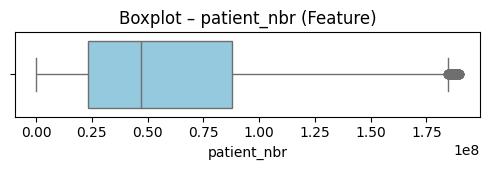

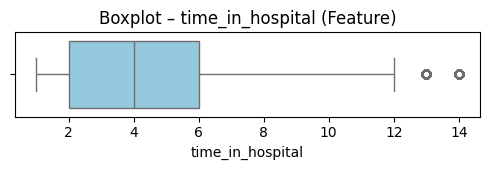

In [345]:
eda.plot_boxplot(CFG, df)

#### Handling outliers

In [346]:
eda.show_data_types(df)

2025-08-12 13:45:22,147 - INFO - ℹ️ [eda.show_data_types()]
admission_source_id          int64
admission_type_id            int64
discharge_disposition_id     int64
encounter_id                 int64
num_lab_procedures           int64
num_medications              int64
num_procedures               int64
number_diagnoses             int64
number_emergency             int64
number_inpatient             int64
number_outpatient            int64
patient_nbr                  int64
time_in_hospital             int64
acarbose                    object
acetohexamide               object
age                         object
change                      object
chlorpropamide              object
diabetesmed                 object
diag_1                      object
diag_2                      object
diag_3                      object
gender                      object
glimepiride                 object
glimepiride-pioglitazone    object
glipizide                   object
glipizide-metformin         ob

In [347]:
df = eda.deal_outliers(CFG, df)
df.head()

2025-08-12 13:45:22,153 - INFO - ℹ️ [eda.deal_outliers()] Step 'deal_outliers' skipped because `CLEANING.OUTLIERS: {}`


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,diag_1,diag_2,diag_3,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted
1,7,1,1,149190,59,18,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,276,250.01,255,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30
2,7,1,1,64410,11,13,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,648,250,V27,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO
3,7,1,1,500364,44,16,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,8,250.43,403,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
4,7,1,1,16680,51,8,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,197,157,250,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO
5,2,2,1,35754,31,16,6,9,0,0,0,82637451,3,No,No,[50-60),No,No,Yes,414,411,250,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30


##### Transformations spécifiques au dataset

In [348]:
df = eda.apply_specific_transformations(CFG, df)
df.head()

2025-08-12 13:45:22,339 - INFO - ℹ️ Specific transformations applied on diag_1, diag_2, diag_3
2025-08-12 13:45:22,385 - INFO - ℹ️ Dropped rows with 'Unknown/Invalid' in 'gender' column
2025-08-12 13:45:22,421 - INFO - ℹ️ Created 'medication_category' column
2025-08-12 13:45:22,435 - INFO - ℹ️ Created 'total_nb_visits' column
2025-08-12 13:45:22,436 - INFO - ℹ️ [eda.apply_specific_transformations()] Specific transformations from 'specific_transformations.py' applied


,admission_source_id,admission_type_id,discharge_disposition_id,encounter_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,patient_nbr,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted,code_range_1,code_range_2,code_range_3,medication_category,total_nb_visits
1,7,1,1,149190,59,0,9,0,0,0,55629189,3,No,No,[10-20),Ch,No,Yes,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30,240-279,240-279,240-279,10-19,1
2,7,1,1,64410,11,5,6,0,1,2,86047875,2,No,No,[20-30),No,No,Yes,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO,630-679,240-279,V01-V91,10-19,1
3,7,1,1,500364,44,1,7,0,0,0,82442376,2,No,No,[30-40),Ch,No,Yes,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO,001-139,240-279,390-459,10-19,1
4,7,1,1,16680,51,0,5,0,0,0,42519267,1,No,No,[40-50),Ch,No,Yes,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO,140-239,140-239,240-279,0-9,1
5,2,2,1,35754,31,6,9,0,0,0,82637451,3,No,No,[50-60),No,No,Yes,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30,390-459,390-459,240-279,10-19,1


##### Supprimer les colonnes inutiles après transformations spécifiques

In [349]:
df = eda.drop_unnecessary_columns(CFG, df, after_transformations=True)
df.head()

2025-08-12 13:45:22,473 - INFO - ℹ️ Unnecessary column 'encounter_id' dropped after transformations
2025-08-12 13:45:22,505 - INFO - ℹ️ Unnecessary column 'patient_nbr' dropped after transformations


,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,readmitted,code_range_1,code_range_2,code_range_3,medication_category,total_nb_visits
1,7,1,1,59,0,9,0,0,0,3,No,No,[10-20),Ch,No,Yes,Female,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,>30,240-279,240-279,240-279,10-19,1
2,7,1,1,11,5,6,0,1,2,2,No,No,[20-30),No,No,Yes,Female,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,NO,630-679,240-279,V01-V91,10-19,1
3,7,1,1,44,1,7,0,0,0,2,No,No,[30-40),Ch,No,Yes,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Caucasian,No,No,No,No,No,NO,001-139,240-279,390-459,10-19,1
4,7,1,1,51,0,5,0,0,0,1,No,No,[40-50),Ch,No,Yes,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,NO,140-239,140-239,240-279,0-9,1
5,2,2,1,31,6,9,0,0,0,3,No,No,[50-60),No,No,Yes,Male,No,No,No,No,No,No,Steady,No,No,No,No,No,Caucasian,No,No,No,No,No,>30,390-459,390-459,240-279,10-19,1


___

<h3 style="display:none">IV. Preprocessing</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		IV. Preprocessing
	</strong>
</h3>

In [350]:
X, y = preprocessing.get_X_y(CFG, df)

2025-08-12 13:45:22,543 - INFO - ℹ️ [preprocessing.get_X_y()] (98052, 40), (98052,)


#### Target class balance

2025-08-12 13:45:22,557 - INFO - ℹ️ [preprocessing.plot_target_variable()]
  readmitted  Count  Proportion
0         NO  52337        0.53
1        >30  34649        0.35
2        <30  11066        0.11


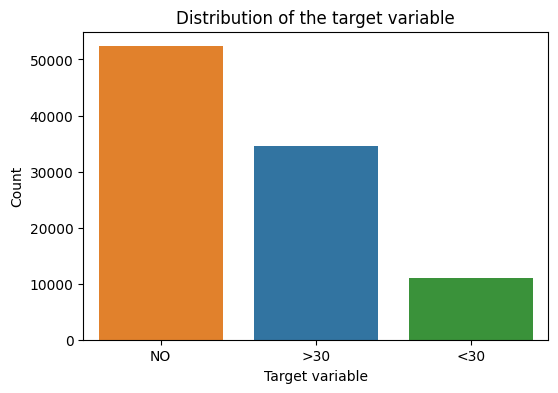

In [351]:
preprocessing.plot_target_variable(CFG, df)

<h4 style="display:none">A. Target Encoding</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		A. Target Encoding
	</strong>
</h4>

In [352]:
y = preprocessing.encode_target_variable(CFG, y)
print(y[0:5])

2025-08-12 13:45:22,757 - INFO - ℹ️ [preprocessing.encode_target_variable()] Target unique values: ['>30' 'NO' '<30']
2025-08-12 13:45:22,762 - INFO - ℹ️ [preprocessing.encode_target_variable()] Target variable encoded with order: ['<30', '>30', 'NO']
[1 2 2 2 1]


<h4 style="display:none">B. Split</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		B. Split
	</strong>
</h4>

##### Train-Test-Split

In [353]:
X_train, X_test, y_train, y_test = preprocessing.split_data(CFG, X, y, test_size=0.2, random_state=42)
X_train.head()

2025-08-12 13:45:22,770 - INFO - ℹ️ [preprocessing.split_data()] Splitting data into train and test sets (`stratify=y`)
2025-08-12 13:45:22,818 - INFO - ℹ️ [preprocessing.split_data()] Train set: (78441, 40) (78441,)
2025-08-12 13:45:22,819 - INFO - ℹ️ [preprocessing.split_data()] Test set: (19611, 40) (19611,)


,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,code_range_1,code_range_2,code_range_3,medication_category,total_nb_visits
8954,17,6,2,67,2,8,1,3,0,4,No,No,[70-80),Ch,No,Yes,Male,No,No,No,No,Steady,No,No,No,No,No,No,Steady,Caucasian,No,No,No,No,No,V01-V91,780-799,800-999,10-19,1
766,7,1,1,23,6,8,0,0,0,2,No,No,[60-70),Ch,No,Yes,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Asian,No,No,No,No,No,800-999,800-999,800-999,20-29,1
52697,7,1,1,50,0,6,0,0,0,4,No,No,[60-70),No,No,Yes,Male,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,460-519,240-279,390-459,10-19,1
27265,7,1,1,54,1,9,0,9,0,4,No,No,[80-90),Ch,No,Yes,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,390-459,390-459,390-459,10-19,12
90454,7,1,1,1,1,9,0,0,0,3,No,No,[40-50),No,No,No,Male,No,No,No,No,No,No,No,No,No,No,No,No,Caucasian,No,No,No,No,No,390-459,390-459,520-579,20-29,1


##### K-Fold

In [354]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

##### Stratified K-Fold
A utiliser si j'ai un déséquilibre de classes

In [355]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

<h4 style="display:none">C. Features Encoding</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		C. Features Encoding
	</strong>
</h4>

<aside style="border-left: 6px solid #007acc; padding: 1em; background-color: #2c2c2c; color: white;">
  <p><strong>☝ Rappel : types de colonnes dans un DataFrame</strong></p>
  <ul>
	<li><strong>Numérique</strong> : <code>int</code>, <code>float</code></li>
	<li><strong>Catégorielle</strong> : généralement de type <code>object</code> ou <code>category</code>
	  <ul>
		<li><strong>Nominale</strong> : pas d’ordre logique (ex. : <code>'bleu'</code>, <code>'rouge'</code>, <code>'vert'</code>) → encoder avec <code>OneHotEncoder</code></li>
		<li><strong>Ordinale</strong> : ordre logique (ex. : <code>'faible'</code>, <code>'moyen'</code>, <code>'élevé'</code>) → encoder avec <code>OrdinalEncoder</code></li>
	  </ul>
	</li>
  </ul>
</aside>


In [356]:
eda.unique_object_values(X_train[list(X_train.select_dtypes(include=["object"]).columns)])

2025-08-12 13:45:23,105 - INFO - ℹ️ [eda.unique_object_values()]
acarbose: ['No' 'Steady' 'Up' 'Down']
age: ['[70-80)' '[60-70)' '[80-90)' '[40-50)' '[30-40)' '[50-60)' '[20-30)'
 '[90-100)' '[10-20)' '[0-10)']
change: ['Ch' 'No']
chlorpropamide: ['No' 'Steady' 'Up' 'Down']
diabetesmed: ['Yes' 'No']
gender: ['Male' 'Female']
glimepiride: ['No' 'Up' 'Steady' 'Down']
glimepiride-pioglitazone: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Down' 'Up']
glipizide-metformin: ['No' 'Steady']
glyburide: ['Steady' 'No' 'Up' 'Down']
glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
insulin: ['No' 'Up' 'Steady' 'Down']
metformin: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Steady' 'Down' 'Up']
nateglinide: ['No' 'Steady' 'Up' 'Down']
pioglitazone: ['Steady' 'No' 'Up' 'Down']
race: ['Caucasian' 'Asian' 'AfricanAmerican' 'Hispanic' 'Other']
repaglinide: ['No' 'Steady' 'Down' 'Up']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
tolazamide: ['No' 'Steady']
tolbutamide: ['No' 'Steady']
troglitazone: ['No' 'St

<aside style="border-left: 6px solid #007acc; padding: 1em; background-color: #2c2c2c; color: white;">
  <p>Si apparaissent des ⚠️ dans l'output de la précédente cellule, c'est que le split a fait que certaines valeurs ne sont retrouvés uniquement dans le train ou le test, donc ne pas y prêter attention.</p>
</aside>

In [357]:
X_train.head()

,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,acarbose,acetohexamide,age,change,chlorpropamide,diabetesmed,gender,glimepiride,glimepiride-pioglitazone,glipizide,glipizide-metformin,glyburide,glyburide-metformin,insulin,metformin,metformin-pioglitazone,miglitol,nateglinide,pioglitazone,race,repaglinide,rosiglitazone,tolazamide,tolbutamide,troglitazone,code_range_1,code_range_2,code_range_3,medication_category,total_nb_visits
8954,17,6,2,67,2,8,1,3,0,4,No,No,[70-80),Ch,No,Yes,Male,No,No,No,No,Steady,No,No,No,No,No,No,Steady,Caucasian,No,No,No,No,No,V01-V91,780-799,800-999,10-19,1
766,7,1,1,23,6,8,0,0,0,2,No,No,[60-70),Ch,No,Yes,Male,No,No,No,No,No,No,Up,No,No,No,No,No,Asian,No,No,No,No,No,800-999,800-999,800-999,20-29,1
52697,7,1,1,50,0,6,0,0,0,4,No,No,[60-70),No,No,Yes,Male,No,No,Steady,No,No,No,No,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,460-519,240-279,390-459,10-19,1
27265,7,1,1,54,1,9,0,9,0,4,No,No,[80-90),Ch,No,Yes,Male,No,No,Steady,No,No,No,Steady,No,No,No,No,No,AfricanAmerican,No,No,No,No,No,390-459,390-459,390-459,10-19,12
90454,7,1,1,1,1,9,0,0,0,3,No,No,[40-50),No,No,No,Male,No,No,No,No,No,No,No,No,No,No,No,No,Caucasian,No,No,No,No,No,390-459,390-459,520-579,20-29,1


##### OneHotEncoder

In [358]:
X_train_final, X_test_final, onehot_encoded_new_columns = preprocessing.apply_onehotencoder(CFG, X_train, X_test)
X_train_final.head()

2025-08-12 13:45:23,158 - INFO - ℹ️ [preprocessing.apply_onehotencoder()] Applying OneHotEncoder to columns: ['acarbose', 'acetohexamide', 'change', 'chlorpropamide', 'code_range_1', 'code_range_2', 'code_range_3', 'diabetesmed', 'gender', 'glimepiride', 'glimepiride-pioglitazone', 'glipizide', 'glipizide-metformin', 'glyburide', 'glyburide-metformin', 'insulin', 'metformin', 'metformin-pioglitazone', 'miglitol', 'nateglinide', 'pioglitazone', 'race', 'repaglinide', 'rosiglitazone', 'tolazamide', 'tolbutamide', 'troglitazone']
2025-08-12 13:45:23,562 - INFO - ℹ️ [preprocessing.apply_onehotencoder()] OneHotEncoded new columns: ['acarbose_Down', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'acetohexamide_No', 'change_Ch', 'change_No', 'chlorpropamide_Down', 'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up', 'code_range_1_001-139', 'code_range_1_140-239', 'code_range_1_240-279', 'code_range_1_280-289', 'code_range_1_290-319', 'code_range_1_320-389', 'code_range_1_390-4

,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,age,medication_category,total_nb_visits,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,acetohexamide_No,change_Ch,change_No,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,code_range_1_001-139,code_range_1_140-239,code_range_1_240-279,code_range_1_280-289,code_range_1_290-319,code_range_1_320-389,code_range_1_390-459,code_range_1_460-519,code_range_1_520-579,code_range_1_580-629,code_range_1_630-679,code_range_1_680-709,code_range_1_710-739,code_range_1_740-759,code_range_1_780-799,code_range_1_800-999,code_range_1_E000-E999,code_range_1_V01-V91,code_range_2_001-139,code_range_2_140-239,code_range_2_240-279,code_range_2_280-289,code_range_2_290-319,code_range_2_320-389,code_range_2_390-459,code_range_2_460-519,code_range_2_520-579,code_range_2_580-629,code_range_2_630-679,code_range_2_680-709,code_range_2_710-739,code_range_2_740-759,code_range_2_780-799,code_range_2_800-999,code_range_2_E000-E999,code_range_2_V01-V91,code_range_3_001-139,code_range_3_140-239,code_range_3_240-279,code_range_3_280-289,code_range_3_290-319,code_range_3_320-389,code_range_3_390-459,code_range_3_460-519,code_range_3_520-579,code_range_3_580-629,code_range_3_630-679,code_range_3_680-709,code_range_3_710-739,code_range_3_740-759,code_range_3_780-799,code_range_3_800-999,code_range_3_E000-E999,code_range_3_V01-V91,diabetesmed_No,diabetesmed_Yes,gender_Female,gender_Male,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glipizide-metformin_No,glipizide-metformin_Steady,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,metformin_Down,metformin_No,metformin_Steady,metformin_Up,metformin-pioglitazone_No,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,tolazamide_No,tolazamide_Steady,tolbutamide_No,tolbutamide_Steady,troglitazone_No,troglitazone_Steady
8954,17,6,2,67,2,8,1,3,0,4,[70-80),10-19,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
766,7,1,1,23,6,8,0,0,0,2,[60-70),20-29,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
52697,7,1,1,50,0,6,0,0,0,4,[60-70),10-19,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

##### OrdinalEncoder

In [359]:
X_train_final, X_test_final = preprocessing.apply_ordinalencoder(CFG, X_train_final, X_test_final)
X_train_final.head()

2025-08-12 13:45:23,659 - INFO - ℹ️ [preprocessing.apply_ordinalencoder()] Applying ordinalencoder to ['age', 'medication_category']


,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,age,medication_category,total_nb_visits,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,acetohexamide_No,change_Ch,change_No,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,code_range_1_001-139,code_range_1_140-239,code_range_1_240-279,code_range_1_280-289,code_range_1_290-319,code_range_1_320-389,code_range_1_390-459,code_range_1_460-519,code_range_1_520-579,code_range_1_580-629,code_range_1_630-679,code_range_1_680-709,code_range_1_710-739,code_range_1_740-759,code_range_1_780-799,code_range_1_800-999,code_range_1_E000-E999,code_range_1_V01-V91,code_range_2_001-139,code_range_2_140-239,code_range_2_240-279,code_range_2_280-289,code_range_2_290-319,code_range_2_320-389,code_range_2_390-459,code_range_2_460-519,code_range_2_520-579,code_range_2_580-629,code_range_2_630-679,code_range_2_680-709,code_range_2_710-739,code_range_2_740-759,code_range_2_780-799,code_range_2_800-999,code_range_2_E000-E999,code_range_2_V01-V91,code_range_3_001-139,code_range_3_140-239,code_range_3_240-279,code_range_3_280-289,code_range_3_290-319,code_range_3_320-389,code_range_3_390-459,code_range_3_460-519,code_range_3_520-579,code_range_3_580-629,code_range_3_630-679,code_range_3_680-709,code_range_3_710-739,code_range_3_740-759,code_range_3_780-799,code_range_3_800-999,code_range_3_E000-E999,code_range_3_V01-V91,diabetesmed_No,diabetesmed_Yes,gender_Female,gender_Male,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glipizide-metformin_No,glipizide-metformin_Steady,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,metformin_Down,metformin_No,metformin_Steady,metformin_Up,metformin-pioglitazone_No,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,tolazamide_No,tolazamide_Steady,tolbutamide_No,tolbutamide_Steady,troglitazone_No,troglitazone_Steady
8954,17,6,2,67,2,8,1,3,0,4,7.0,1.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
766,7,1,1,23,6,8,0,0,0,2,6.0,2.0,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
52697,7,1,1,50,0,6,0,0,0,4,6.0,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<h4 style="display:none">D. Resampling</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		D. Resampling
	</strong>
</h4>

In [360]:
X_train_resampled, y_train_resampled = preprocessing.resample_data(CFG, X_train_final, y_train, X_train_final[list((X_train_final.select_dtypes(include=["object", "category"]).columns))])

2025-08-12 13:45:23,749 - INFO - ℹ️ [preprocessing.resample_data()] Before resampling : Counter({np.int8(2): 41869, np.int8(1): 27719, np.int8(0): 8853})
2025-08-12 13:45:24,663 - INFO - ℹ️ [preprocessing.resample_data()] SMOTE applied
2025-08-12 13:45:24,672 - INFO - ℹ️ [preprocessing.resample_data()] After resampling  : Counter({np.int8(0): 41869, np.int8(2): 41869, np.int8(1): 41869})


<h4 style="display:none">E. Feature Scaling</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		E. Feature Scaling
	</strong>
</h4>

A scaler :
- colonnes numériques continues
- colonnes encodées en ordinal

A ne **pas** scaler :
- colonnes one-hot encodés

In [361]:
X_train_scaled, X_test_scaled = preprocessing.scale_data(X_train_resampled, X_test_final, onehot_encoded_new_columns)
X_train_scaled.head()

2025-08-12 13:45:24,699 - INFO - ℹ️ [preprocessing.scale_data()] Scaled columns: ['admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'number_emergency', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'age', 'medication_category', 'total_nb_visits']
2025-08-12 13:45:24,700 - INFO - ℹ️ [preprocessing.scale_data()] Unscaled columns: ['acarbose_Down', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'acetohexamide_No', 'change_Ch', 'change_No', 'chlorpropamide_Down', 'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up', 'code_range_1_001-139', 'code_range_1_140-239', 'code_range_1_240-279', 'code_range_1_280-289', 'code_range_1_290-319', 'code_range_1_320-389', 'code_range_1_390-459', 'code_range_1_460-519', 'code_range_1_520-579', 'code_range_1_580-629', 'code_range_1_630-679', 'code_range_1_680-709', 'code_range_1_710-739', 'code_range_1_740-759', 'code_range_1_780-799', 'code_rang

,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,age,medication_category,total_nb_visits,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,acetohexamide_No,change_Ch,change_No,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,code_range_1_001-139,code_range_1_140-239,code_range_1_240-279,code_range_1_280-289,code_range_1_290-319,code_range_1_320-389,code_range_1_390-459,code_range_1_460-519,code_range_1_520-579,code_range_1_580-629,code_range_1_630-679,code_range_1_680-709,code_range_1_710-739,code_range_1_740-759,code_range_1_780-799,code_range_1_800-999,code_range_1_E000-E999,code_range_1_V01-V91,code_range_2_001-139,code_range_2_140-239,code_range_2_240-279,code_range_2_280-289,code_range_2_290-319,code_range_2_320-389,code_range_2_390-459,code_range_2_460-519,code_range_2_520-579,code_range_2_580-629,code_range_2_630-679,code_range_2_680-709,code_range_2_710-739,code_range_2_740-759,code_range_2_780-799,code_range_2_800-999,code_range_2_E000-E999,code_range_2_V01-V91,code_range_3_001-139,code_range_3_140-239,code_range_3_240-279,code_range_3_280-289,code_range_3_290-319,code_range_3_320-389,code_range_3_390-459,code_range_3_460-519,code_range_3_520-579,code_range_3_580-629,code_range_3_630-679,code_range_3_680-709,code_range_3_710-739,code_range_3_740-759,code_range_3_780-799,code_range_3_800-999,code_range_3_E000-E999,code_range_3_V01-V91,diabetesmed_No,diabetesmed_Yes,gender_Female,gender_Male,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glipizide-metformin_No,glipizide-metformin_Steady,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,metformin_Down,metformin_No,metformin_Steady,metformin_Up,metformin-pioglitazone_No,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,tolazamide_No,tolazamide_Steady,tolbutamide_No,tolbutamide_Steady,troglitazone_No,troglitazone_Steady
0,2.752875,2.824700,-0.338300,1.206548,0.485991,0.264040,0.852326,1.651533,-0.270545,-0.127966,0.552274,-0.215203,-0.569771,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.291595,-0.670543,-0.520015,-1.042135,2.938807,0.264040,-0.203339,-0.501821,-0.270545,-0.806798,-0.115304,1.021897,-0.569771,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.291595,-0.670543,-0.520015,0.337739,-0.740417,-0.857717,-0.203339,-0.501821,-0.270545,-0.12796

<h4 style="display:none">F. Correlations</h4>
<h4 style="background-color:#143b4e; color:white; padding:10px; margin:0;">
	<strong>
		F. Correlations
	</strong>
</h4>

##### Plot the correlation matrix

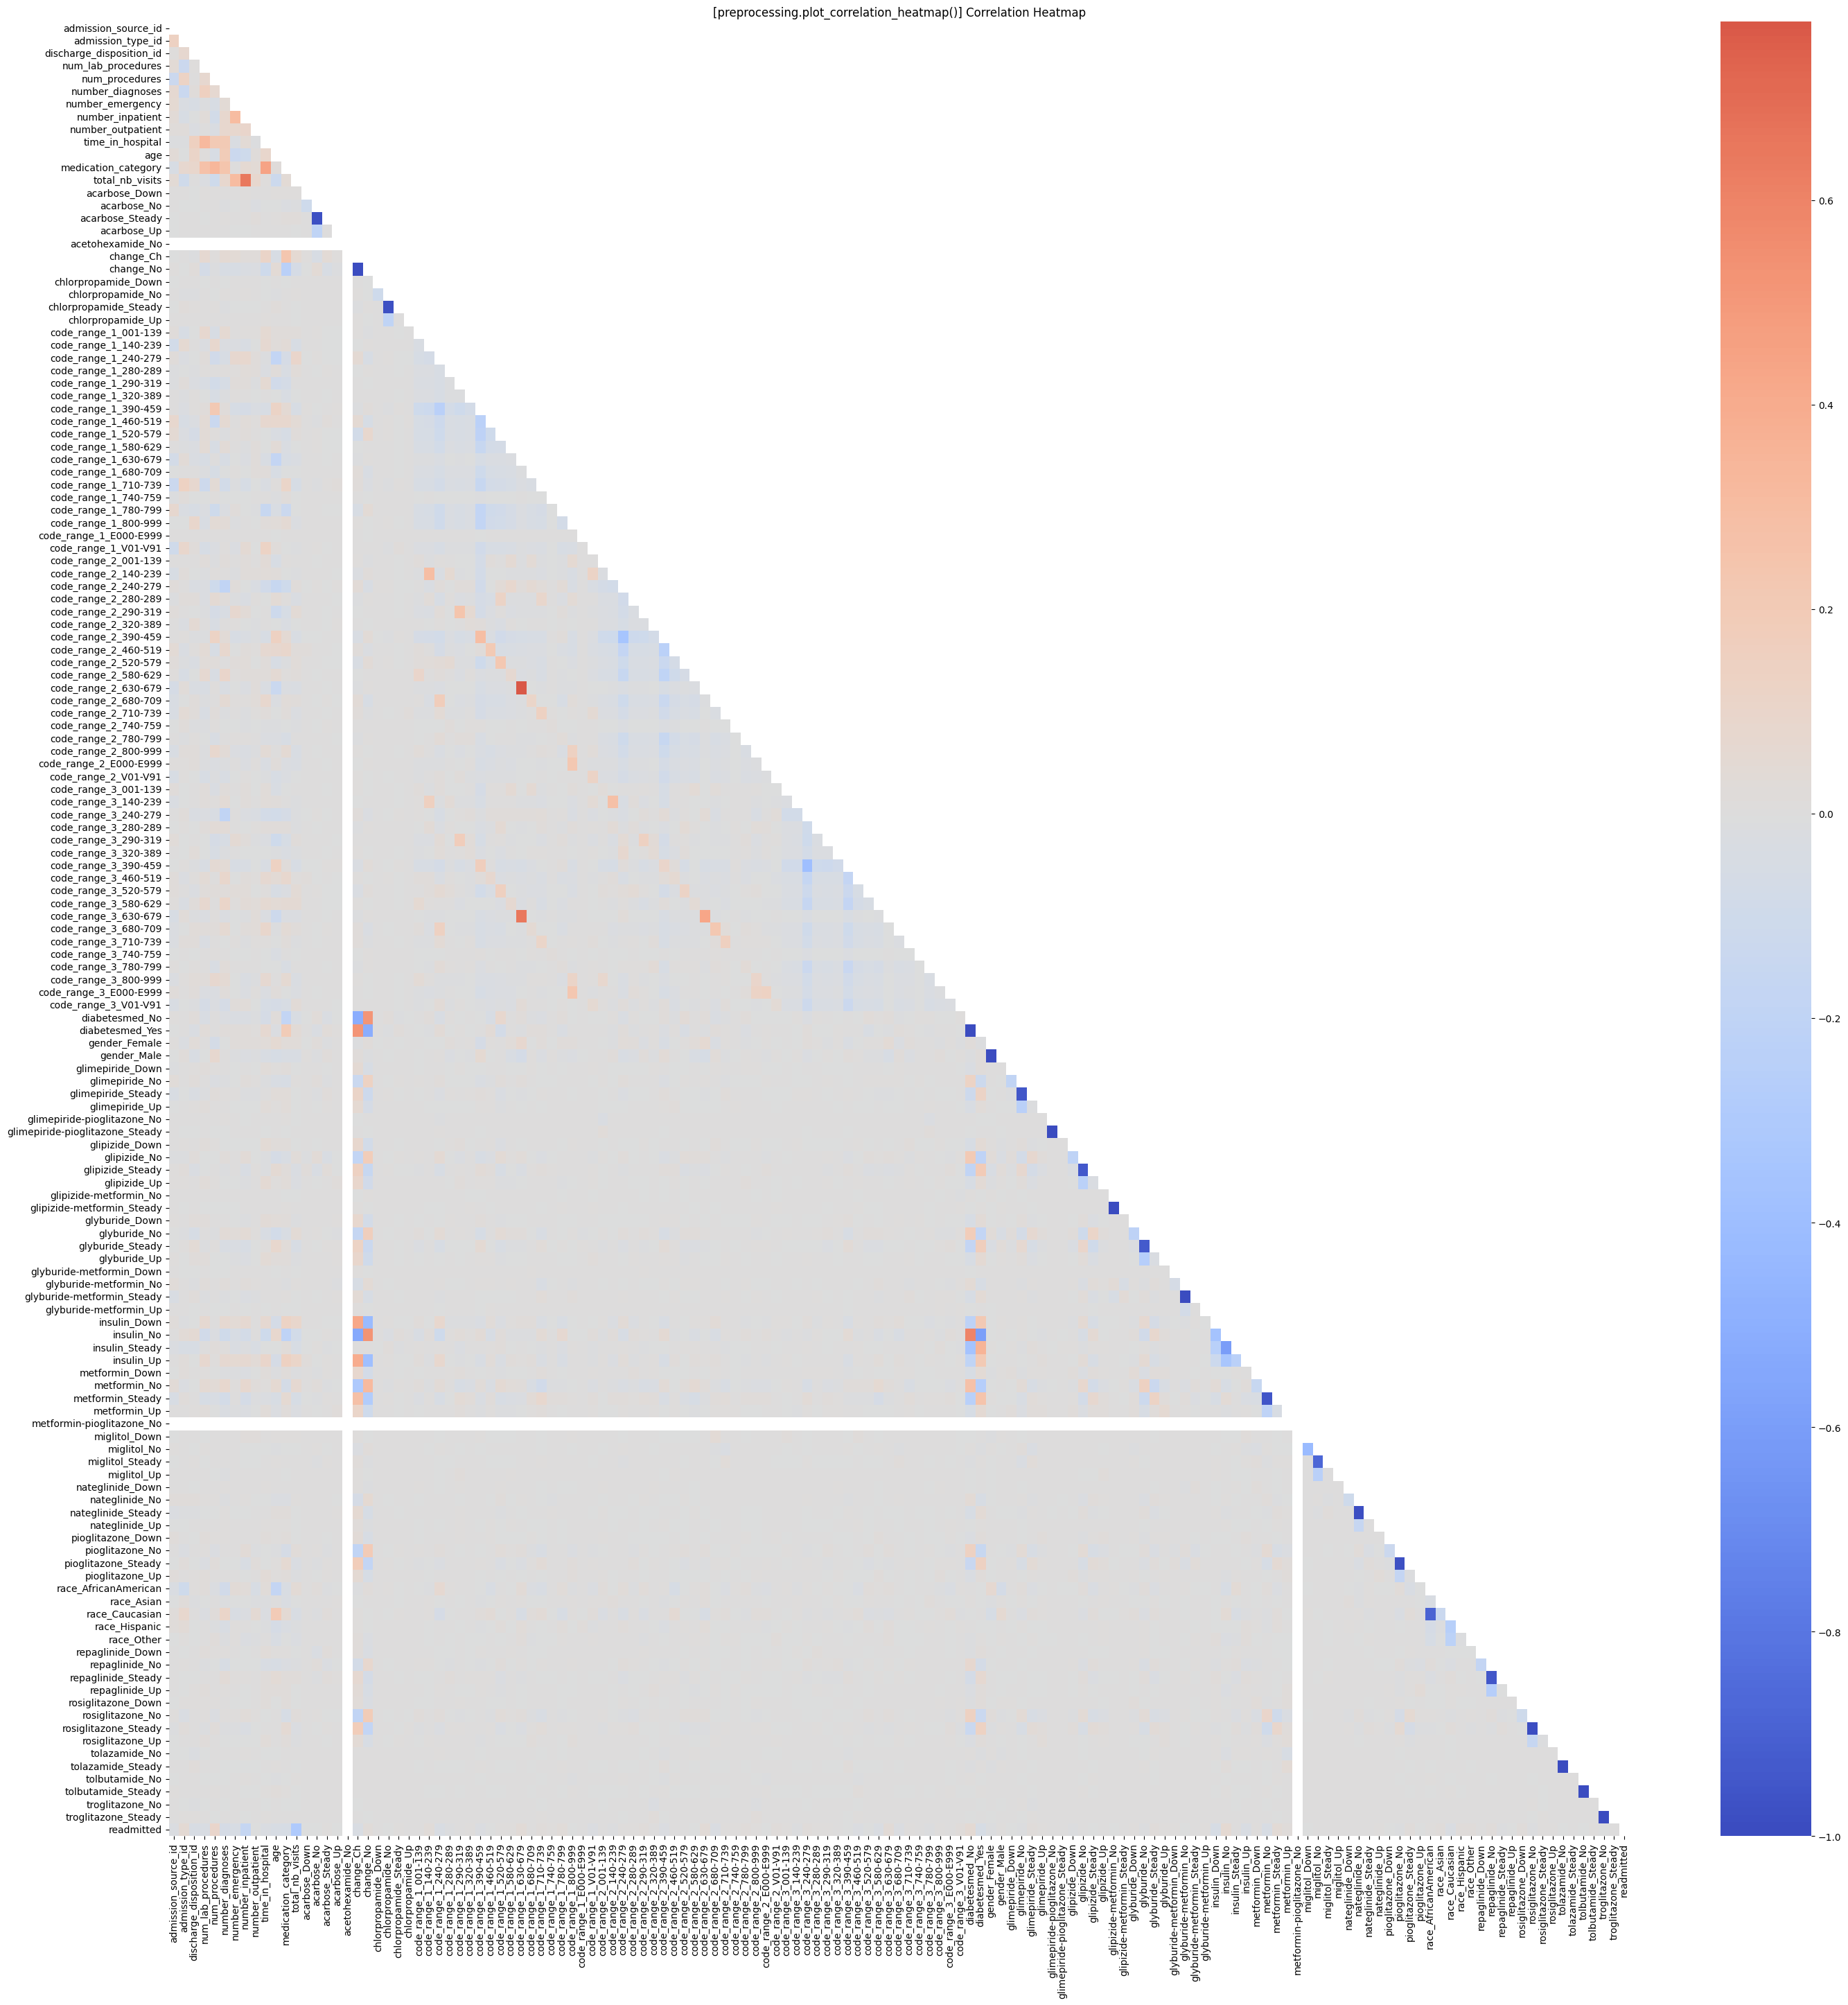

In [362]:
preprocessing.plot_correlation_heatmap(pd.concat([X_train_scaled, pd.Series(y_train_resampled, name=CFG.TARGET_VARIABLE)], axis=1))

#### Show the $n$ most correlated features with the target variable

In [363]:
preprocessing.show_most_correlated_features(CFG, pd.concat([X_train_scaled, pd.Series(y_train_resampled, name=CFG.TARGET_VARIABLE)], axis=1), n=10)

2025-08-12 13:45:33,412 - INFO - ℹ️ [preprocessing.show_most_correlated_features()] Top 10 most correlated features with 'readmitted':
1) total_nb_visits : -0.31
2) number_inpatient : -0.16
3) num_procedures : 0.10
4) number_diagnoses : -0.06
5) insulin_No : 0.06
6) insulin_Down : -0.06
7) medication_category : -0.06
8) diabetesmed_No : 0.05
9) diabetesmed_Yes : -0.05
10) number_emergency : -0.05


___

<h3 style="display:none">V. Feature Engineering</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		V. Feature Engineering
	</strong>
</h3>

##### Feature creation/transformation

In [364]:
X_train_selected, X_test_selected = feature_engineering.apply_feature_creation_and_transformations(CFG, X_train_scaled, X_test_scaled)

2025-08-12 13:45:33,419 - INFO - ℹ️ [feature_engineering.apply_feature_creation_and_transformations()] 'feature_creation_and_transformations.py' file exists but is empty, skipping feature creation and transformations


##### Feature Selection

##### Dimensionality Reduction 

In [365]:
X_train_selected, X_test_selected = feature_engineering.apply_dimensionality_reduction(CFG, X_train_scaled, X_test_scaled, y_train_resampled, y_test)
X_train_selected.head()

2025-08-12 13:45:33,425 - INFO - ℹ️ [feature_engineering.apply_dimensionality_reduction()] Dimensionality reduction applied to dataset with 142 features.
2025-08-12 13:45:33,426 - INFO - ℹ️ [feature_engineering.apply_dimensionality_reduction()] Applying SelectKBest with k=50
2025-08-12 13:45:33,597 - INFO - ℹ️ [feature_engineering.apply_dimensionality_reduction()] Features sélectionnées : ['admission_source_id', 'admission_type_id', 'discharge_disposition_id', 'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'number_emergency', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'age', 'medication_category', 'total_nb_visits', 'change_Ch', 'change_No', 'code_range_1_140-239', 'code_range_1_240-279', 'code_range_1_390-459', 'code_range_1_460-519', 'code_range_1_630-679', 'code_range_1_710-739', 'code_range_1_780-799', 'code_range_1_800-999', 'code_range_1_V01-V91', 'code_range_2_140-239', 'code_range_2_390-459', 'code_range_2_460-519', 'code_range_2_630-679', 'code_r

/Users/allisterkohn/.pyenv/versions/3.11.9/envs/allisterml-env/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 17 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/allisterkohn/.pyenv/versions/3.11.9/envs/allisterml-env/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,admission_source_id,admission_type_id,discharge_disposition_id,num_lab_procedures,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital,age,medication_category,total_nb_visits,change_Ch,change_No,code_range_1_140-239,code_range_1_240-279,code_range_1_390-459,code_range_1_460-519,code_range_1_630-679,code_range_1_710-739,code_range_1_780-799,code_range_1_800-999,code_range_1_V01-V91,code_range_2_140-239,code_range_2_390-459,code_range_2_460-519,code_range_2_630-679,code_range_2_680-709,code_range_2_800-999,code_range_3_140-239,code_range_3_240-279,code_range_3_390-459,code_range_3_580-629,code_range_3_630-679,code_range_3_680-709,diabetesmed_No,diabetesmed_Yes,glimepiride_Steady,insulin_Down,insulin_No,insulin_Up,metformin_No,metformin_Steady,pioglitazone_No,pioglitazone_Steady,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,2.752875,2.824700,-0.338300,1.206548,0.485991,0.264040,0.852326,1.651533,-0.270545,-0.127966,0.552274,-0.215203,-0.569771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.291595,-0.670543,-0.520015,-1.042135,2.938807,0.264040,-0.203339,-0.501821,-0.270545,-0.806798,-0.115304,1.021897,-0.569771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.291595,-0.670543,-0.520015,0.337739,-0.740417,-0.857717,-0.203339,-0.501821,-0.270545,-0.127966,-0.115304,-0.215203,-0.569771,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.291595,-0.670543,-0.520015,0.542165,-0.127213,0.824919,-0.203339,5.958241,-0.270545,-0.127966,1.219853,-0.215203,3.293945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.291595,-0.670543,-0.520015,-2.166476,-0.127213,0.824919,-0.203339,-0.501821,-0.270545,-0.467382,-1.450461,1.021897,-0.569771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


___

<h3 style="display:none">VI. Training</h3>
<h3 style="background-color:#3c2d49; color:white; padding:10px; margin:0;">
	<strong>
		VI. Training
	</strong>
</h3>

In [366]:
df_results = training.apply_models(CFG, X_train_selected, y_train_resampled, X_test_selected, y_test)
df_results

2025-08-12 13:45:33,617 - INFO - ℹ️ [training.apply_models()] Training classification models
2025-08-12 13:45:33,618 - INFO - ℹ️ [training.train_classification_models()] Models to train: ['XGBClassifier', 'LogisticRegression', 'CatBoostClassifier']
2025-08-12 13:45:35,435 - INFO - ℹ️ [evaluation.evaluate_classification_model()] XGBClassifier: F1-score (↑): 0.54, Recall (↑): 0.54, Precision (↑): 0.63, Accuracy (↑): 0.72, ROC AUC (↑): 0.82
2025-08-12 13:45:35,436 - INFO - ℹ️ [evaluation.evaluate_classification_model()] XGBClassifier — Classification report:
              precision    recall  f1-score   support

           0       0.47      0.08      0.14      2213
           1       0.64      0.64      0.64      6930
           2       0.77      0.91      0.83     10468

    accuracy                           0.72     19611
   macro avg       0.63      0.54      0.54     19611
weighted avg       0.69      0.72      0.69     19611

2025-08-12 13:45:35,436 - INFO - ℹ️ [evaluation.evaluate_

2025/08/12 13:45:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2025-08-12 13:45:40,868 - INFO - ℹ️ [evaluation.evaluate_classification_model()] LogisticRegression: F1-score (↑): 0.51, Recall (↑): 0.54, Precision (↑): 0.53, Accuracy (↑): 0.61, ROC AUC (↑): 0.75
2025-08-12 13:45:40,869 - INFO - ℹ️ [evaluation.evaluate_classification_model()] LogisticRegression — Classification report:
              precision    recall  f1-score   support

           0       0.24      0.44      0.31      2213
           1       0.59      0.36      0.45      6930
           2       0.75      0.82      0.78     10468

    accuracy                           0.61     19611
   macro avg       0.53      0.54      0.51     19611
weighted avg       0.64      0.61      0.61     19611

2025-08-12 13:45:40,869 - INFO - ℹ️ [evaluation.evaluate_classification_model()] LogisticRegression — Confusion matrix:
[[ 966  697  550]
 [2164 2471 2295]
 [ 880  999 8589]]


2025/08/12 13:45:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2025-08-12 13:46:14,689 - INFO - ℹ️ [evaluation.evaluate_classification_model()] CatBoostClassifier: F1-score (↑): 0.54, Recall (↑): 0.54, Precision (↑): 0.62, Accuracy (↑): 0.72, ROC AUC (↑): 0.81
2025-08-12 13:46:14,690 - INFO - ℹ️ [evaluation.evaluate_classification_model()] CatBoostClassifier — Classification report:
              precision    recall  f1-score   support

           0       0.44      0.08      0.13      2213
           1       0.64      0.64      0.64      6930
           2       0.77      0.90      0.83     10468

    accuracy                           0.72     19611
   macro avg       0.62      0.54      0.54     19611
weighted avg       0.69      0.72      0.69     19611

2025-08-12 13:46:14,691 - INFO - ℹ️ [evaluation.evaluate_classification_model()] CatBoostClassifier — Confusion matrix:
[[ 175 1549  489]
 [ 180 4461 2289]
 [  41  964 9463]]


2025/08/12 13:46:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,accuracy,precision,recall,f1,roc_auc
model,,,,,
XGBClassifier,0.719,0.627,0.542,0.537,0.815
CatBoostClassifier,0.719,0.618,0.542,0.536,0.814
LogisticRegression,0.613,0.528,0.538,0.513,0.750


___
___